In [29]:
# the required libraries
libs = ['numpy', 'matplotlib', 'sklearn']

# try import the required libraries
# and install them in case there is import error
try:
    for lib in libs:
        __import__(lib)
except ImportError:
    from subprocess import check_call
    from sys import executable
    check_call([executable, '-m', 'pip', 'install'] + libs)
    del check_call
    del executable

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import Perceptron
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split

# suppress the future warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [30]:
np.random.seed(42)

digits = load_digits()
X = digits.data
Y = digits.target
X.shape, Y.shape

((1797, 64), (1797,))

In [31]:
digits.images.reshape(digits.images.shape[0], -1)

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [32]:
X = X.astype("float32") / 255
Y = Y.astype("float32")

model = Perceptron(tol=1e-3, random_state=0)

Test result 0: 99.44%
Test result 1: 93.61%
Test result 2: 99.17%
Test result 3: 98.33%
Test result 4: 98.06%
Test result 5: 98.89%
Test result 6: 99.72%
Test result 7: 98.61%
Test result 8: 92.50%
Test result 9: 92.78%


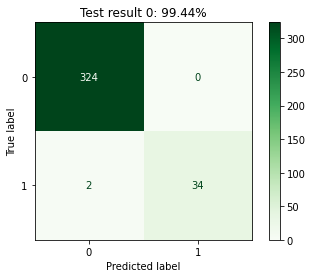

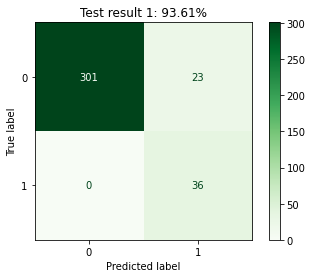

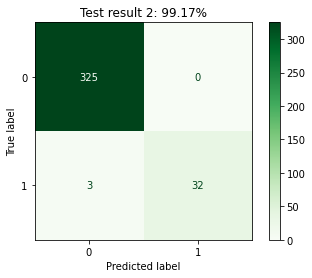

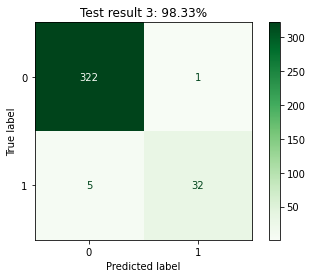

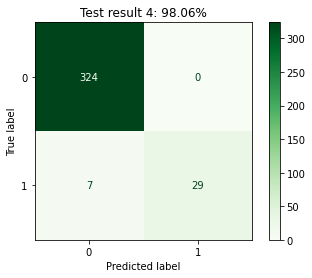

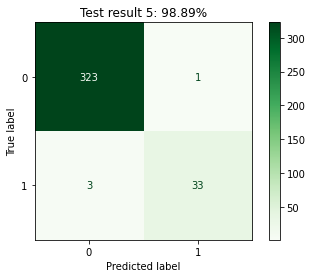

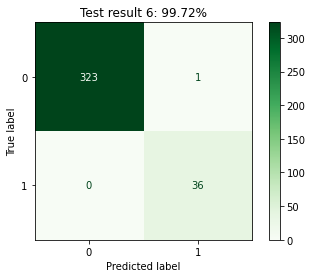

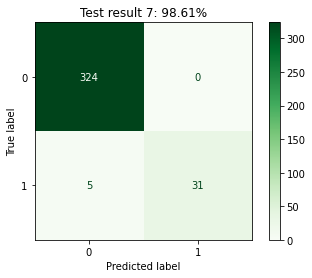

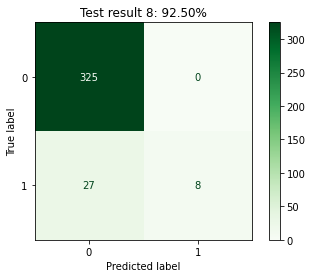

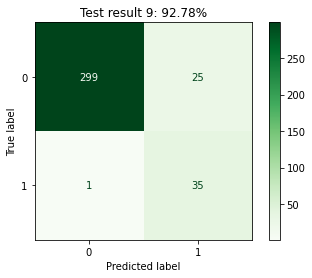

In [33]:
for i in range(10):
    Y_new = (Y == i).astype("int")
    
    # Split into training set and test set
    X_train, X_test, Y_train, Y_test = train_test_split(
        X, Y_new, test_size=0.2, random_state=0, stratify=Y_new
    )
    model.fit(X_train, Y_train)
    score = model.score(X_test, Y_test)
    
    # Plot non-normalized confusion matrix
    np.set_printoptions(precision=2)
    title = f'Test result {i}: {score*100:.2f}%'
    
    disp = plot_confusion_matrix(
        model, X_test, Y_test, cmap=plt.cm.Greens, normalize=None
    )
    disp.ax_.set_title(title)
    print(title)